WellDataBaseML example: Predicting Well production within Eagle Ford Play 
---

A problem demonstrating how **WellDataBaseML** can be applied to predict oil/gas production.

The machine-lerning problem described here relates to the clasical history matching problems.

If **WellDataBaseML** is not installed, first execute `import Pkg; Pkg.add("WellDataBaseML"); Pkg.add("WellDataBase")`.

In [3]:
import WellDataBaseML

┌ Info: Precompiling WellDataBaseML [b2fc4b94-a46a-4cf9-bc84-39b1d777371f]
└ @ Base loading.jl:1278


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6604808866375988933\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14260064878864769296\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6604808866375988933\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/vvv/.julia/packages/PyPlot/XHEG0/src/init.jl:118


In [6]:
import WellDataBase

Firts, the Eagle Ford Play datasets is uploaded:

In [9]:
df, df_header, api, recordlength, dates = WellDataBase.read(["csv-201908102241", "csv-201908102238", "csv-201908102239"]; location="/Users/vvv/Julia/UnconventionalML.jl/data/eagleford-play-20191008", downselect=[:WellType=>"GAS", :Orientation=>"Horizontal"]);

sers/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 9 LastProdDate --> false
└ @ WellDataBase /Users/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 10 WellId --> false
└ @ WellDataBase /Users/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 11 WellName --> false
└ @ WellDataBase /Users/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 12 WellType --> true
└ @ WellDataBase /Users/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 13 WellStatus --> false
└ @ WellDataBase /Users/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 14 CurrentOperator --> false
└ @ WellDataBase /Users/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 15 OriginalOperator --> false
└ @ WellDataBase /Users/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 16 Field --> false
└ @ WellDataBase /Users/vvv/Julia/WellDataBase.jl/src/WellDataBase.jl:199
┌ Info: Col 17 County --> false
└ @ WellDataBase /Users/vvv/Julia/W

The loaded data are provided in the follwoing form: 

- `df`: data frame containing well production transients
- `df_header`: data frame containing well construction attributes
- `api`: a vector with well API's listed in `df` and df_header`
- `recordlength`: the maximum record lenght (in months) for the processed well dataset
- `dates`: range of dates for which produciton data are availables (in months)

Machine learning (ML) analysis can be performed to predict well production based on this dataset.

Under this example, the goal is to use all the data collected up to 2015 for training.

After that, the applied ML methodology performs blind prediction for 1 year ahead (2015-2016).

In [22]:
syears = [2015]
eyears = syears .+ 1

1-element Array{Int64,1}:
 2016

ML analyses is excuted as follows:

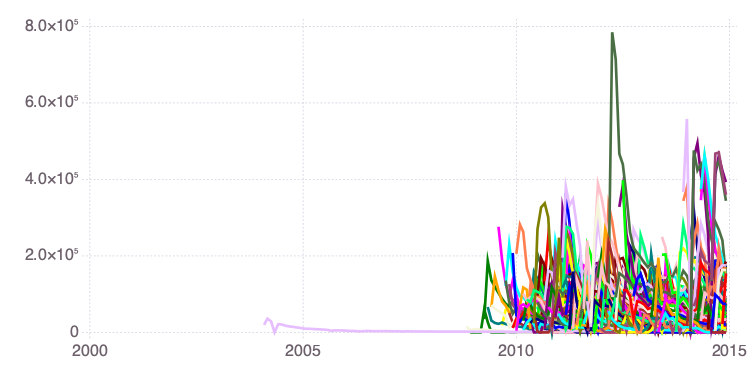

┌ Info: 2015: Number of wells 322
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:122
┌ Info: Training matrix size: (118, 322)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:137


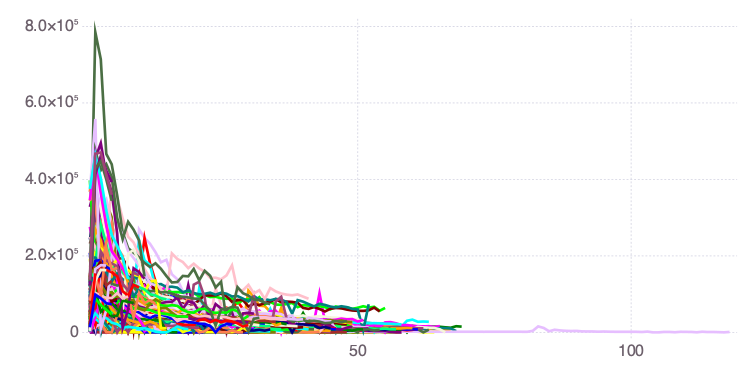

┌ Info: Training start date: 2004-02-01
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:138
┌ Info: Training end   date: 2004-02-01
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:139


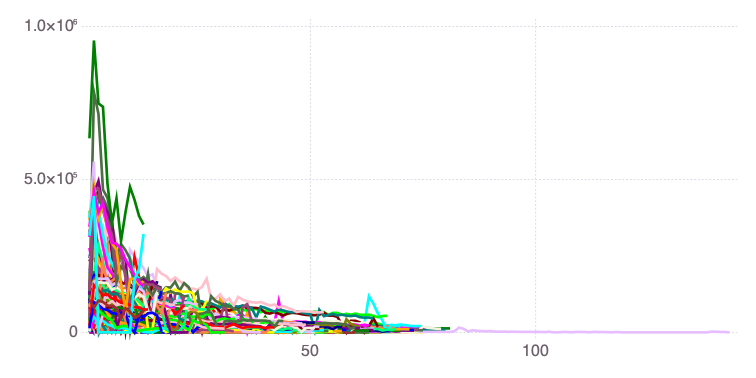

┌ Info: Prediction matrix size: (143, 322)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:144
┌ Info: Prediction start date: 2004-02-01
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:145
┌ Info: Prediction end   date: 2004-02-01
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:146
┌ Info: Training window: 118
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:156
┌ Info: Prediction window: 25
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:157
Dimension 1: No bad indices!
Dimension 2: No bad indices!
┌ Info: Dimension 1 ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkChecks.jl:78
┌ Info: Dimension 2 ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkChecks.jl:78
┌ Info: NMFk #1: gas_2015 Window 118
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:65
Signals:  2 Fit: 3.739159e+12 Silhouette:    0.1872708 AIC:     214955.6
Signals:  3 Fit: 2.436588e+12 Silhouette:    0.5115209 AIC:     211191.1
Signals:  4 Fit: 1.811994e+12 Silh

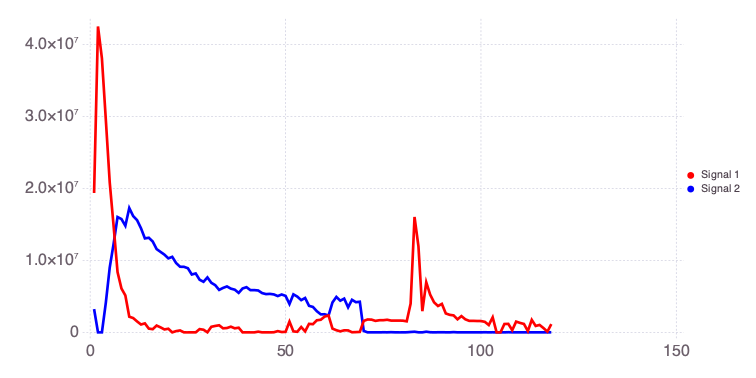

Signals:  2 Fit: 3.739159e+12 Silhouette:    0.1872708 AIC:     214955.6


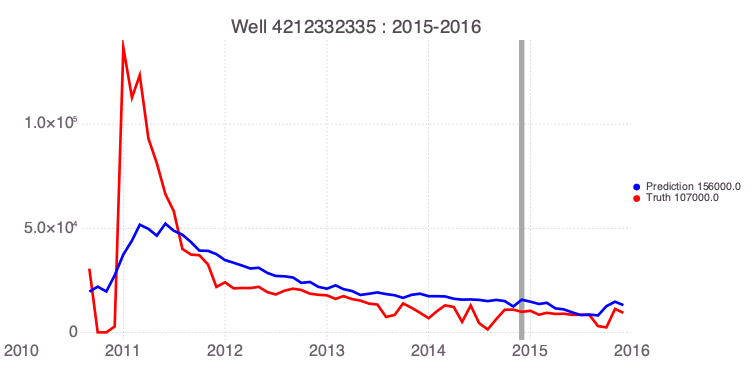

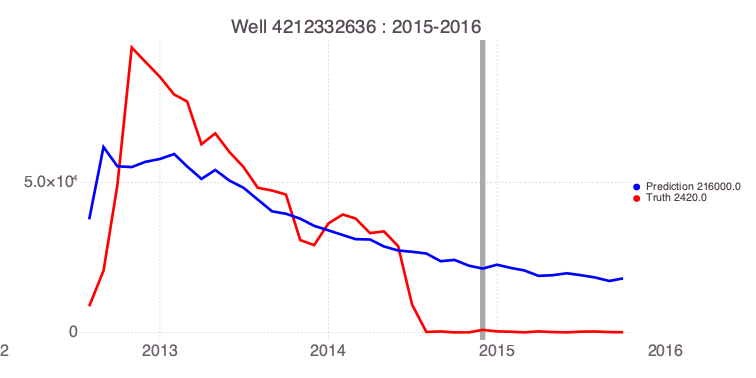

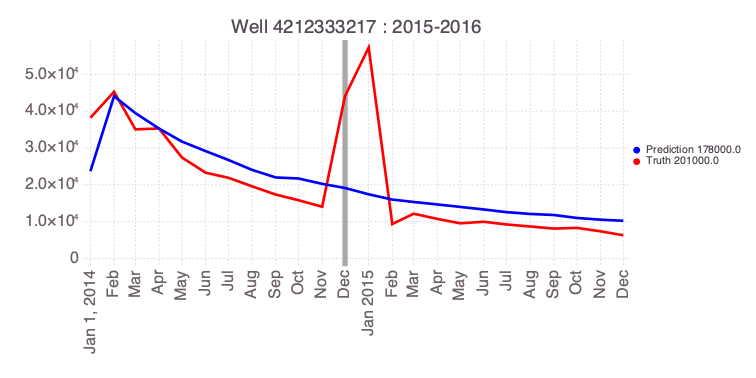

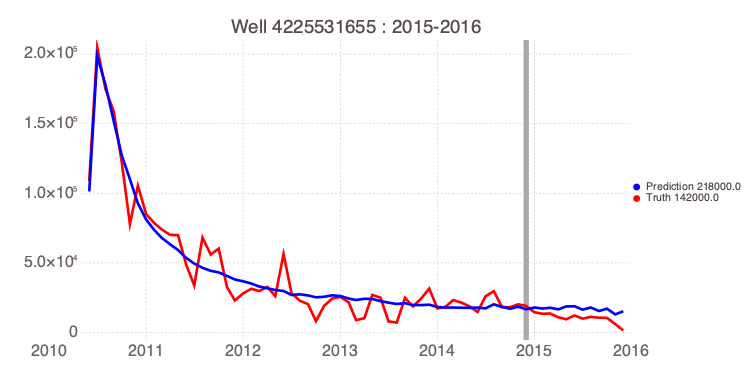

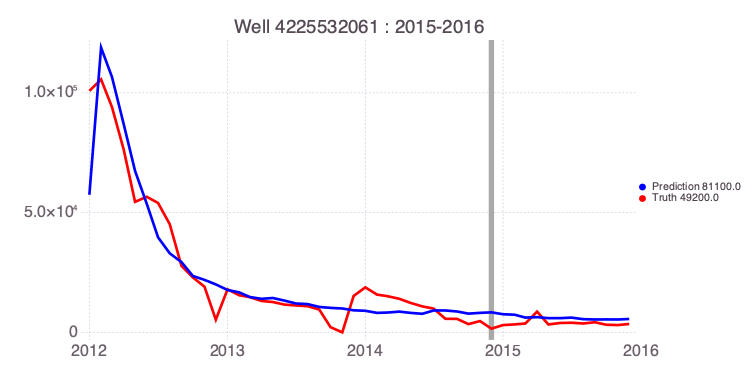

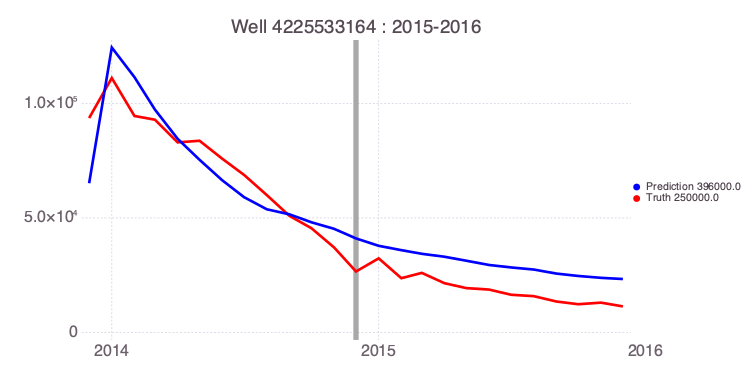

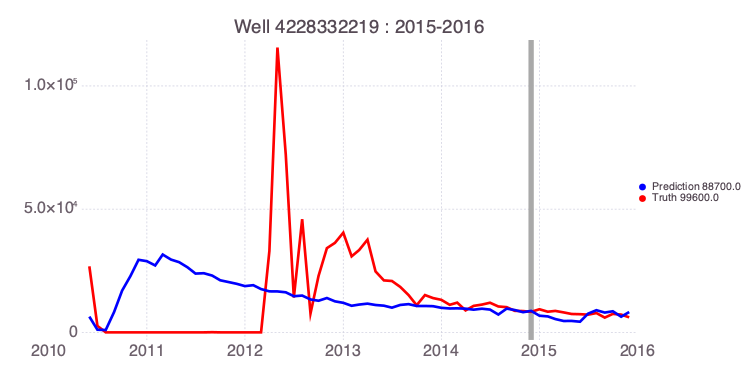

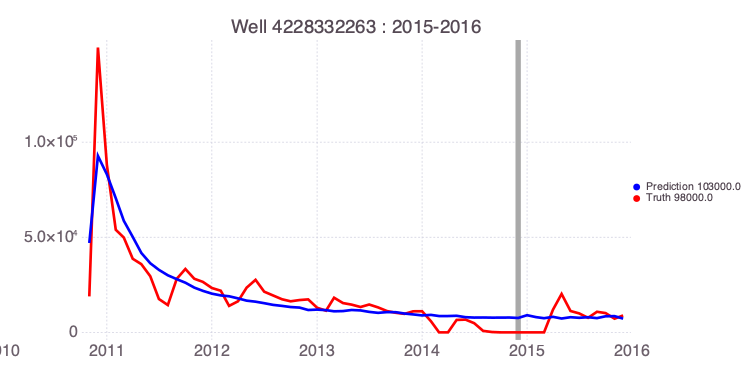

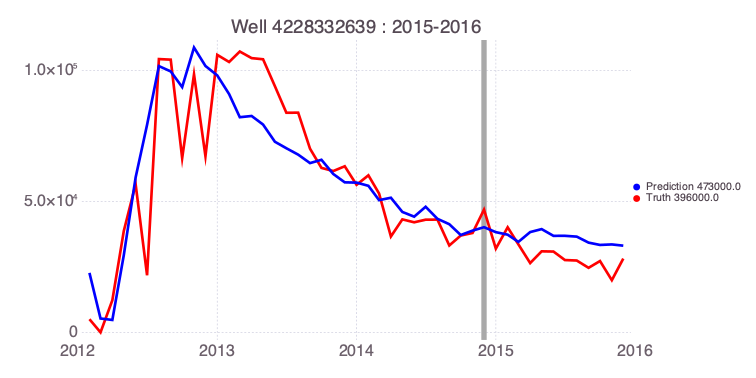

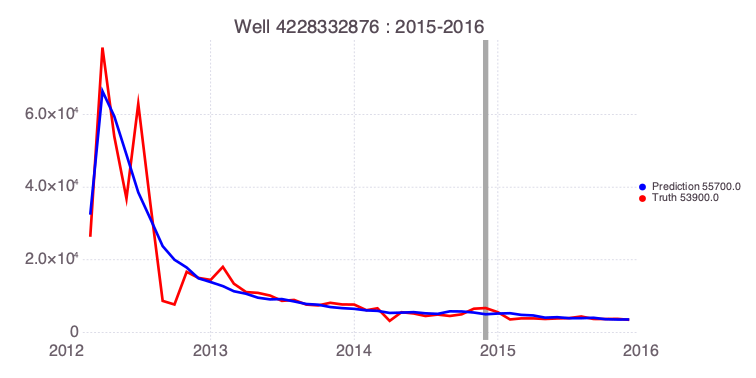

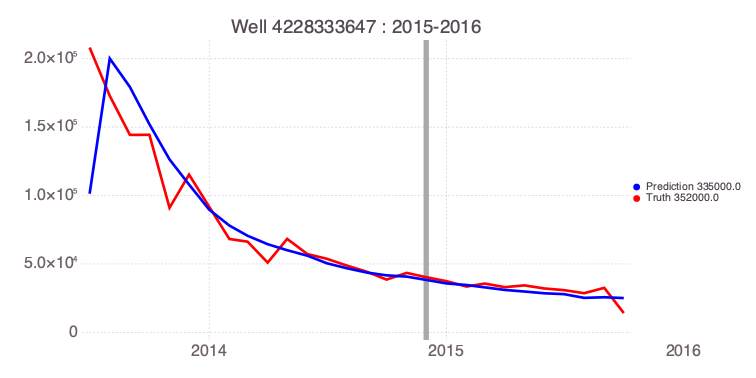

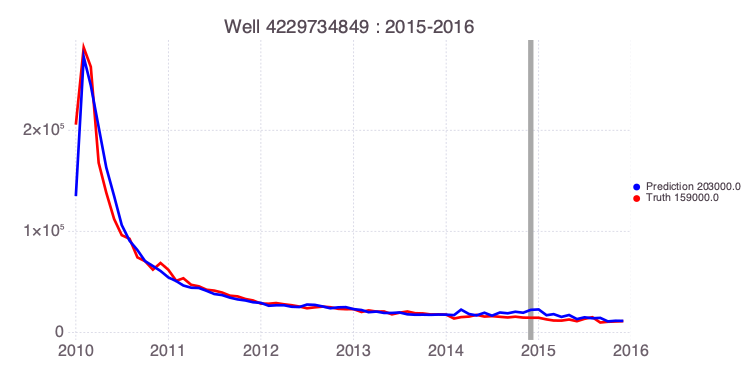

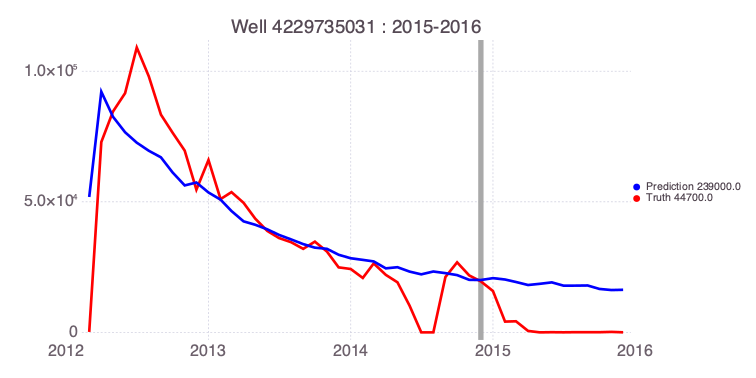

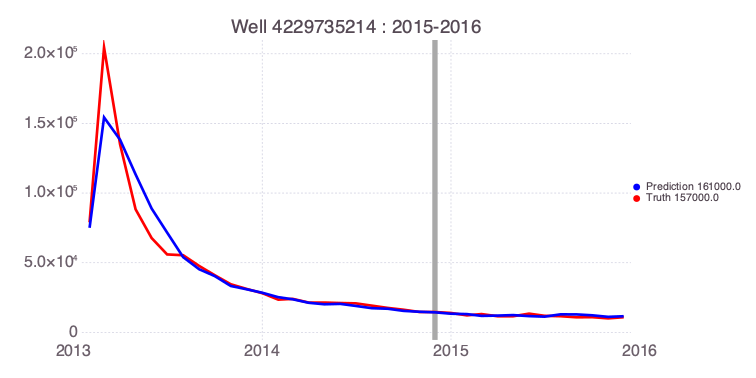

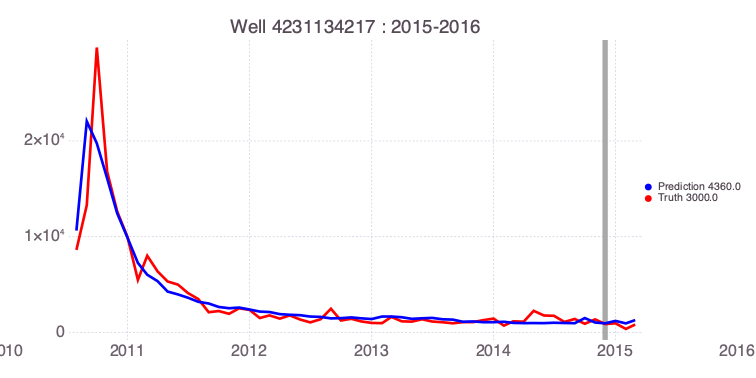

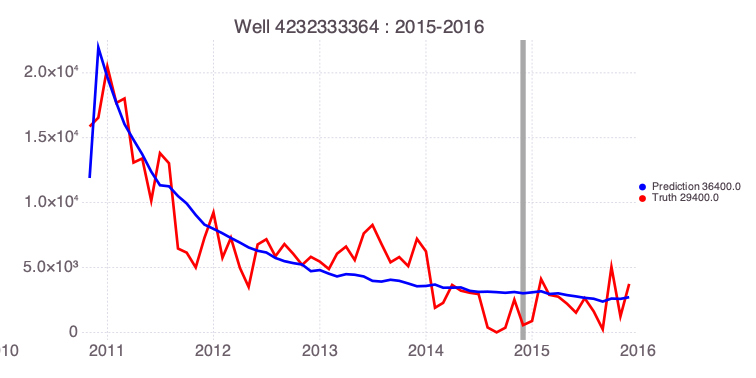

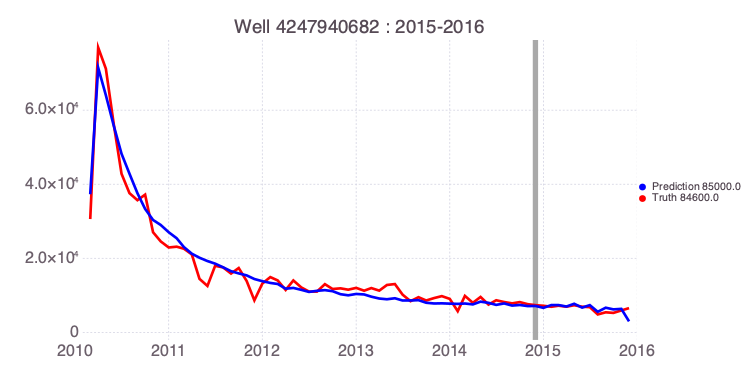

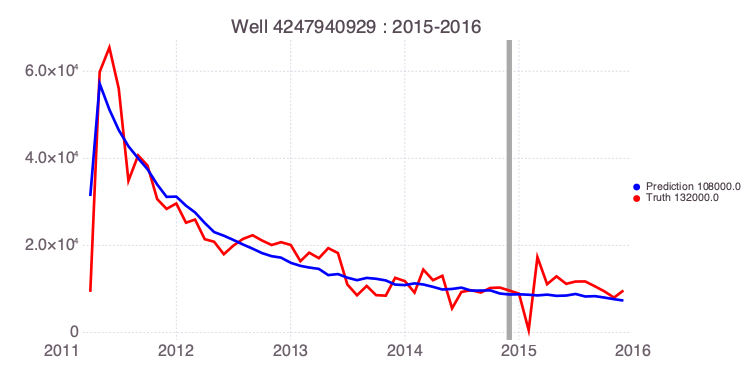

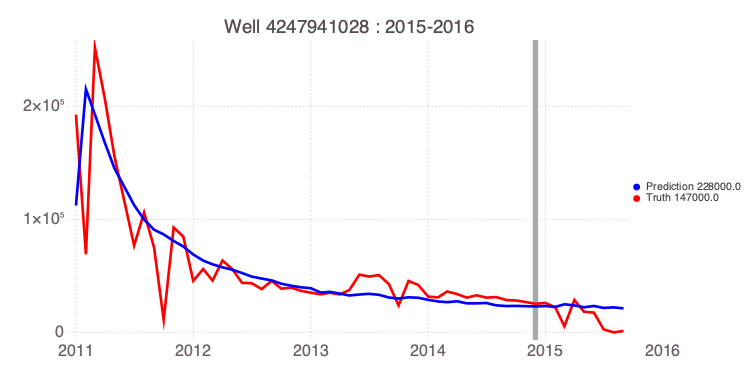

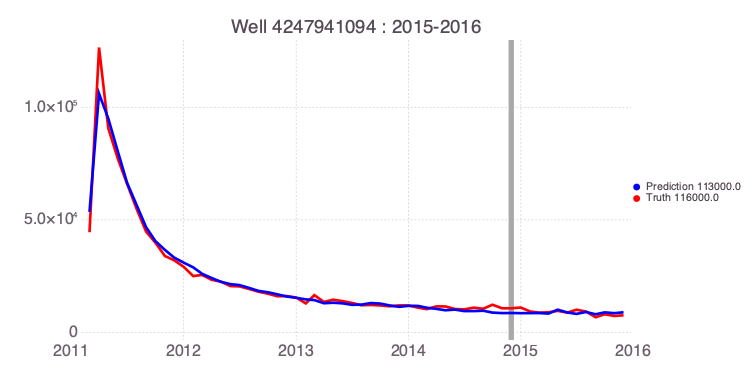

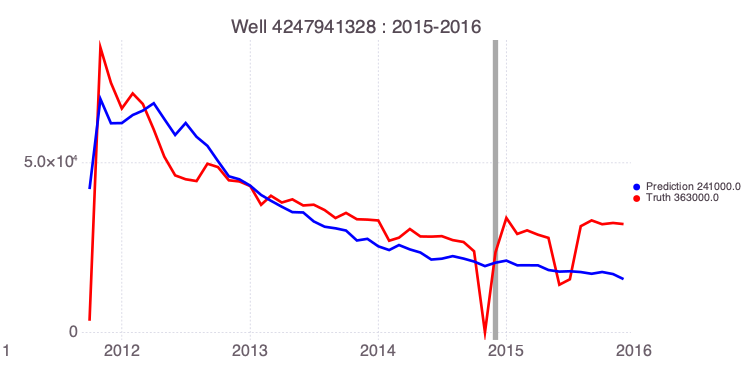

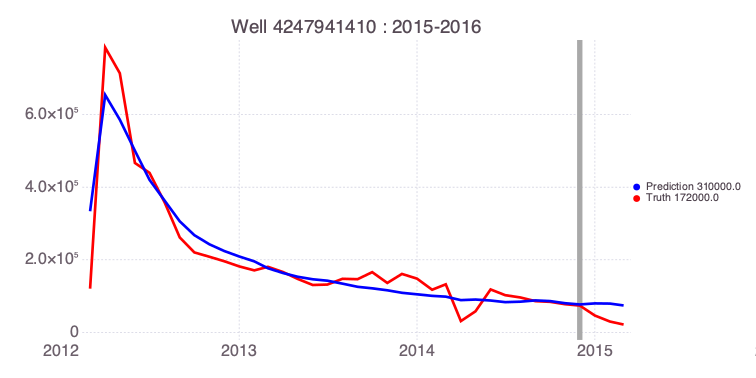

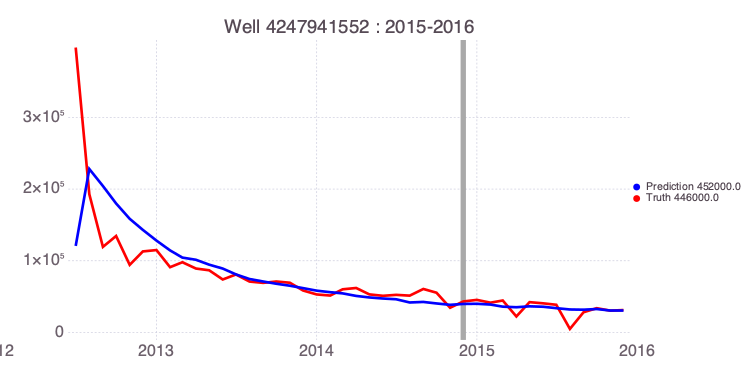

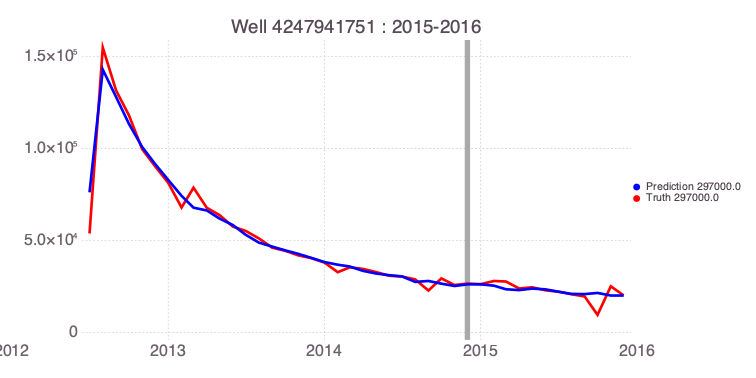

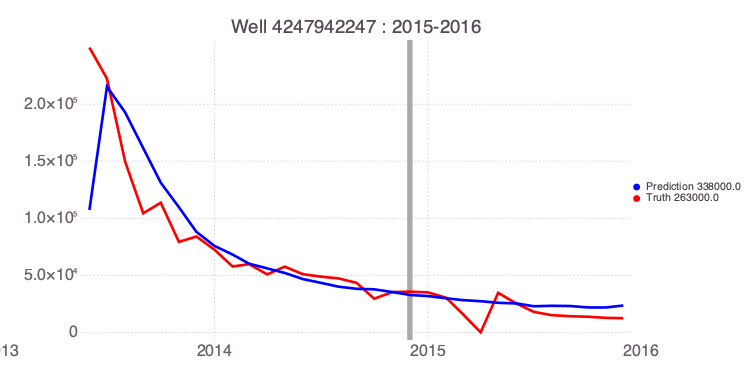

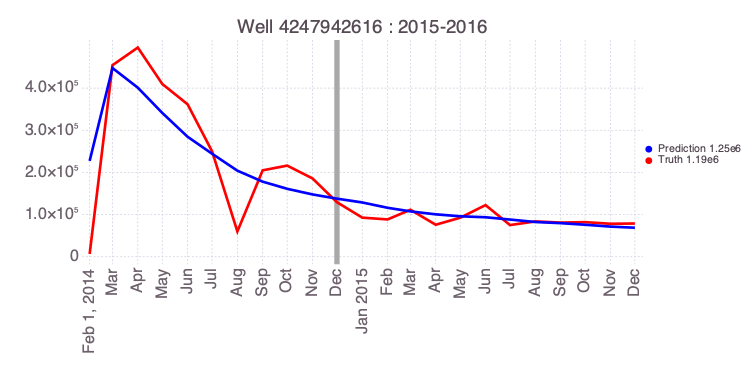

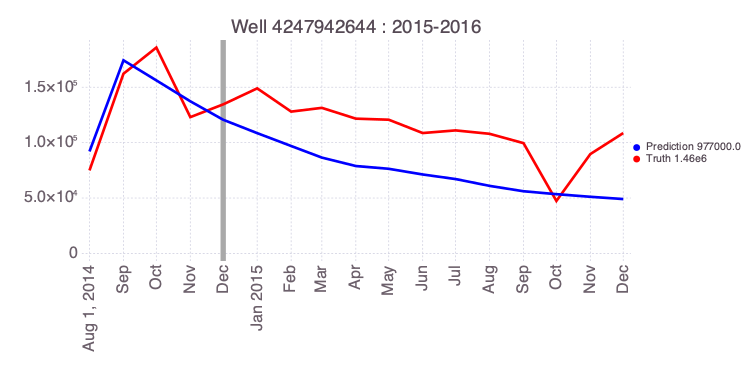

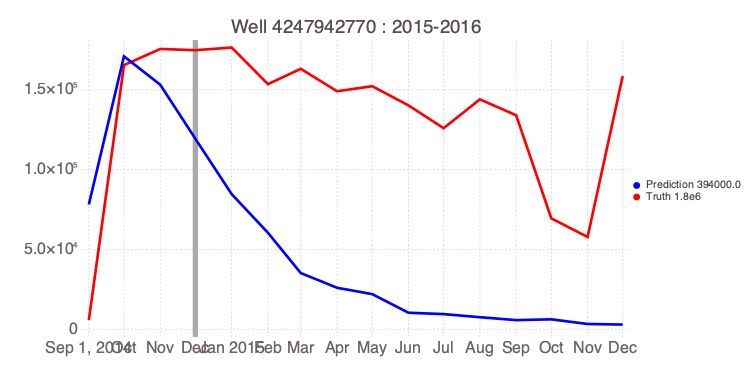

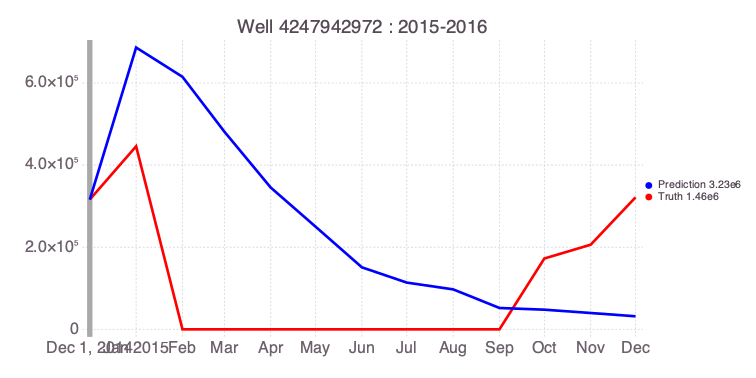

┌ Info: Window 2015: Training size 118 Truth size: 299 Prediction size: 299 R2 (pred): 0.6957154770204516 R2 (all) 0.8702610728541793
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:221
┌ Info: Type A wells: 202
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:235


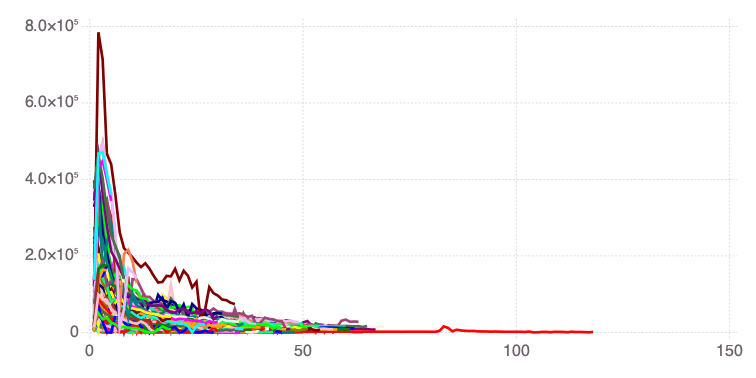

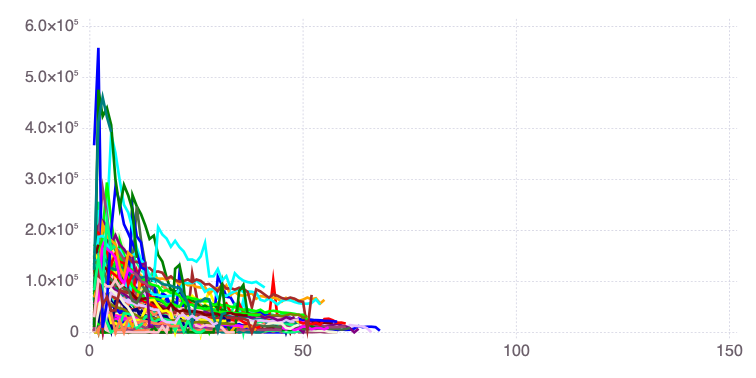

┌ Info: Type B wells: 120
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:235


1×2 Array{Any,2}:
 "EAGLE FORD"  202

┌ Info: Type A wells: 202
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:241
┌ Info: Formation
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:242


23×2 Array{Any,2}:
 "SILVERBOW RESOURCES OPER, LLC"     27
 "LAREDO ENERGY OPERATING, LLC"      21
 "PIONEER NATURAL RES. USA, INC."    18
 "SM ENERGY COMPANY"                 15
 "LEWIS PETRO PROPERTIES, INC."      14
 "SN OPERATING, LLC"                 11
 "ROSETTA RESOURCES OPERATING LP"     9
 "BHP BILLITON PET(TXLA OP) CO"       8
 "BHP BILLITON PETROLEUM"             8
 ""                                   6
 "BHP BILLITON PETROLEUM "            6
 "BURLINGTON RESOURCES O & G CO LP"   6
 "DEVON ENERGY PRODUCTION CO, L.P."   6
 "ESCONDIDO RESOURCES OPER CO, LLC"   6
 "MARATHON OIL EF LLC"                6
 "STATOIL TEXAS ONSHORE PROP LLC"     6
 "ENCANA OIL & GAS(USA) INC."         4
 "EQUINOR TEXAS ONSHORE PROP LLC"     4
 "PROLINE ENERGY RESOURCES INC"       3
 "SWIFT ENERGY OPERATING, LLC"        3
 "EOG RESOURCES, INC."                2
 "PERDIDO ENERGY, LLC"                2
 "ZAZA ENERGY, LLC"                   2

1×2 Array{Any,2}:
 "Horizontal"  202

1×2 Array{Any,2}:
 "EAGLE FORD"  120

19×2 Array{Any,2}:
 "LEWIS PETRO PROPERTIES, INC."      32
 "SM ENERGY COMPANY"                 11
 "PIONEER NATURAL RES. USA, INC."    10
 "BHP BILLITON PET(TXLA OP) CO"       7
 "BURLINGTON RESOURCES O & G CO LP"   7
 "DEVON ENERGY PRODUCTION CO, L.P."   7
 "SILVERBOW RESOURCES OPER, LLC"      7
 "MARATHON OIL EF LLC"                4
 "SN OPERATING, LLC"                  4
 "STATOIL TEXAS ONSHORE PROP LLC"     4
 "ENDEAVOR NATURAL GAS, LP"           3
 "LAREDO ENERGY OPERATING, LLC"       3
 "PERDIDO ENERGY, LLC"                3
 ""                                   2
 "BHP BILLITON PETROLEUM"             2
 "BHP BILLITON PETROLEUM "            2
 "ESCONDIDO RESOURCES OPER CO, LLC"   2
 "FASKEN OIL AND RANCH, LTD."         2
 "ROSETTA RESOURCES OPERATING LP"     2

1×2 Array{Any,2}:
 "Horizontal"  120

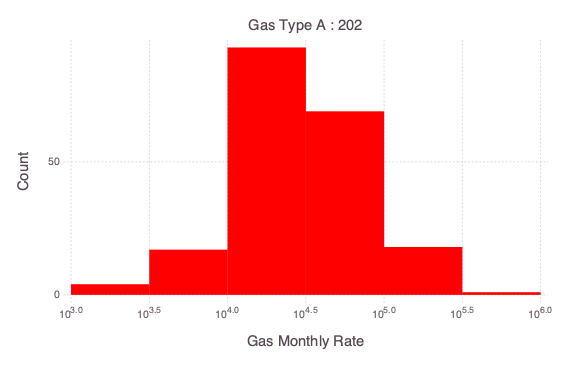

┌ Info: Operator
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:244
┌ Info: Well type
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:246
┌ Info: Type B wells: 120
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:241
┌ Info: Formation
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:242
┌ Info: Operator
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:244
┌ Info: Well type
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:246


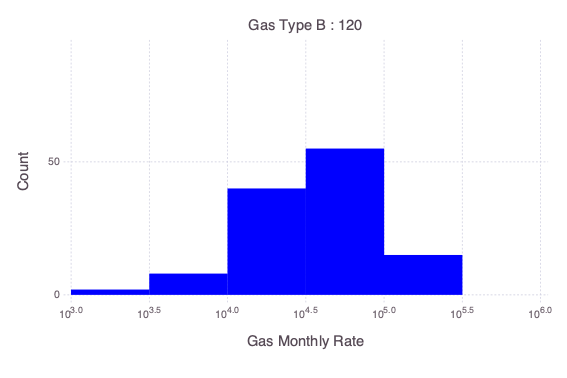

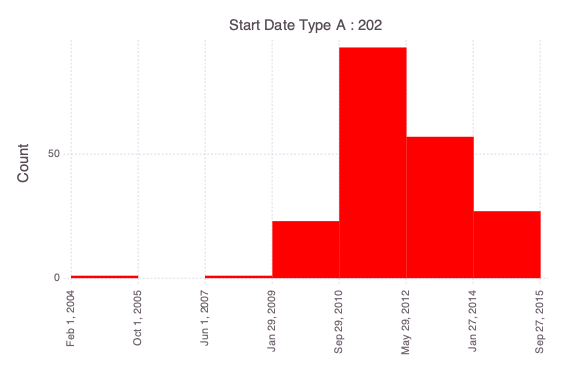

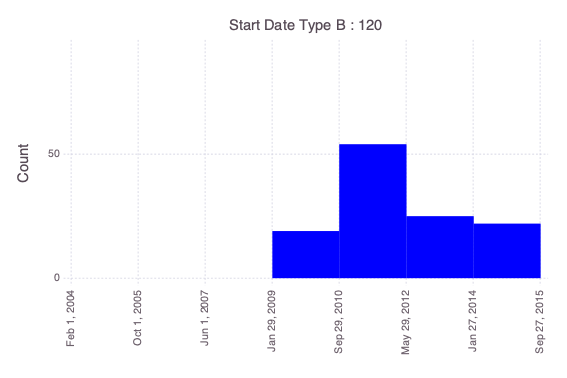

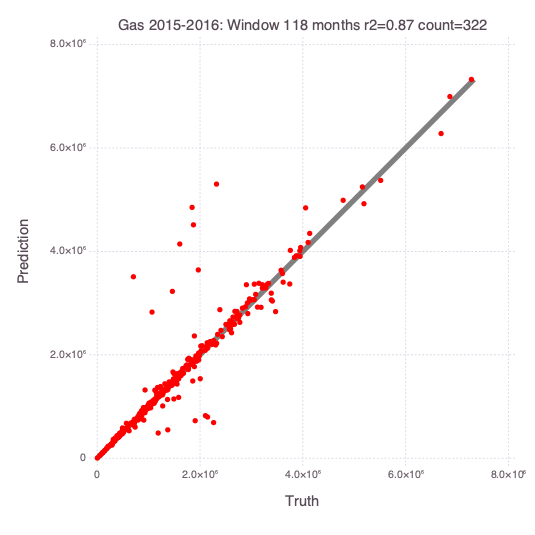

Signals:  3 Fit: 2.436588e+12 Silhouette:    0.5115209 AIC:     211191.1

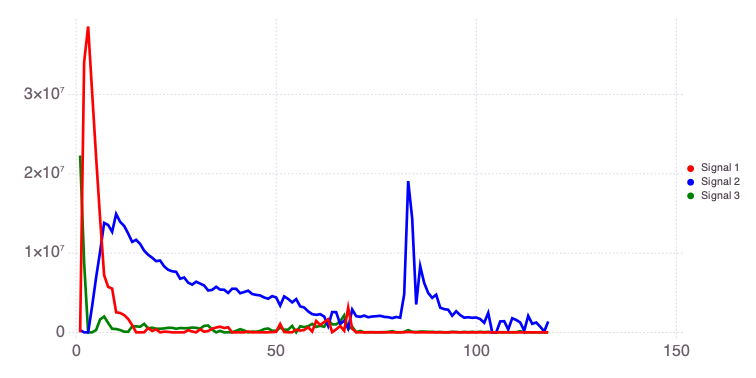

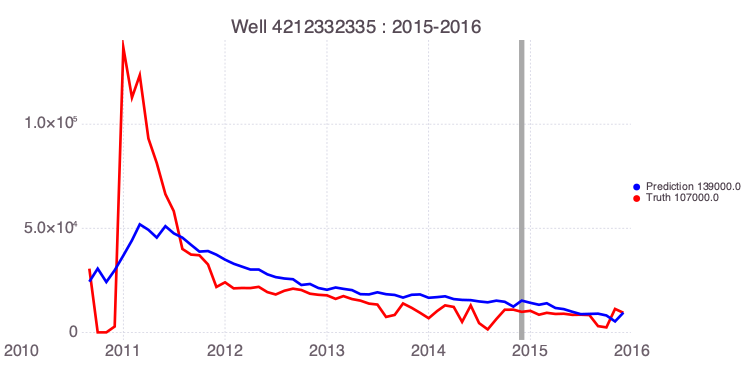

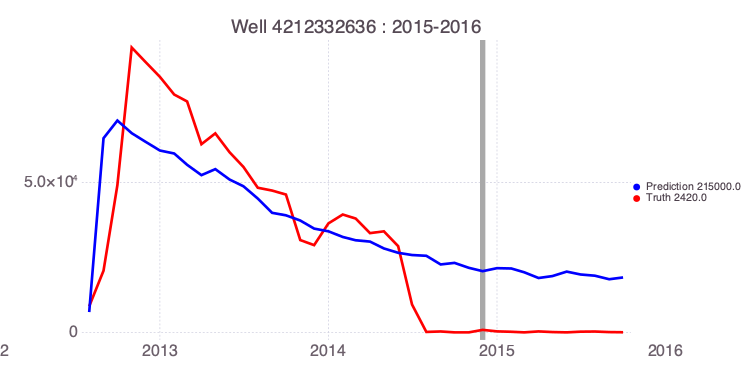

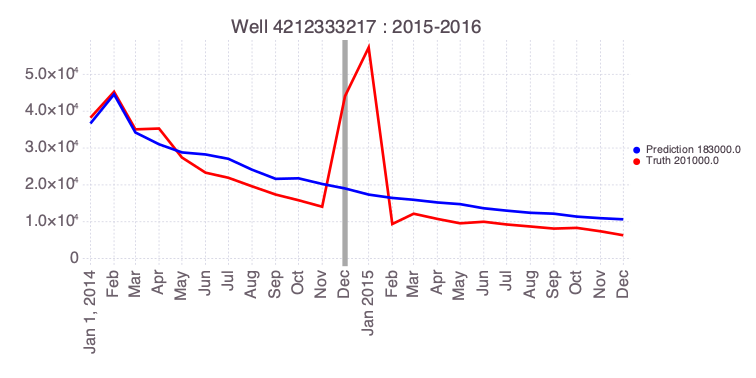

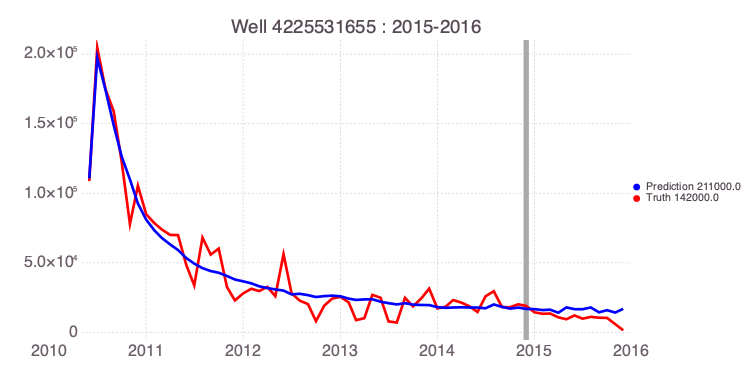

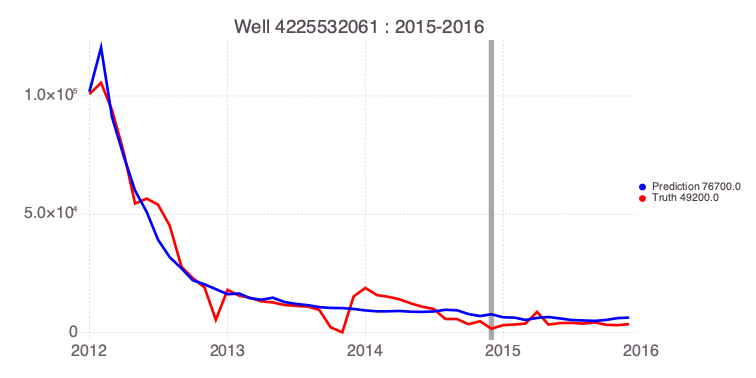

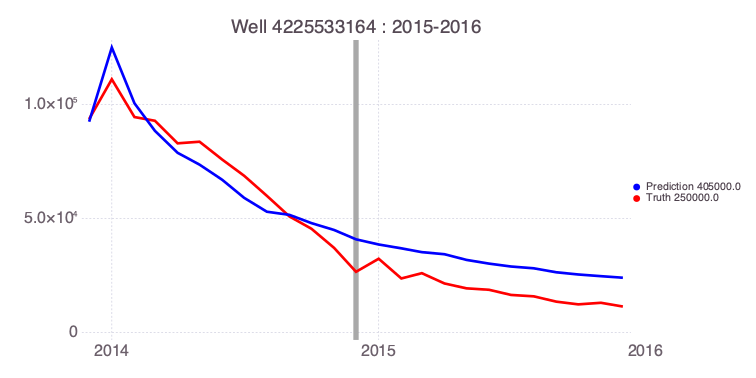

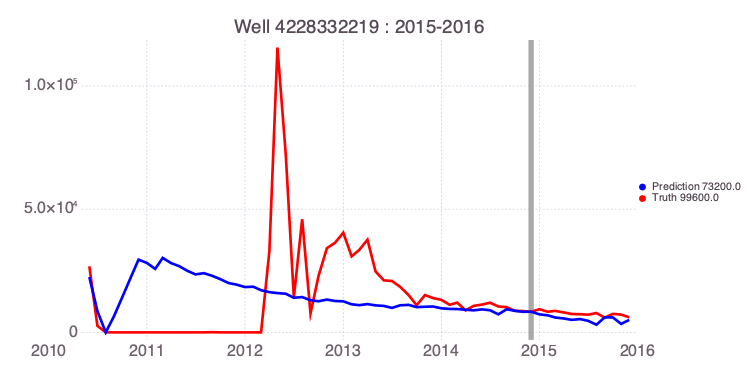

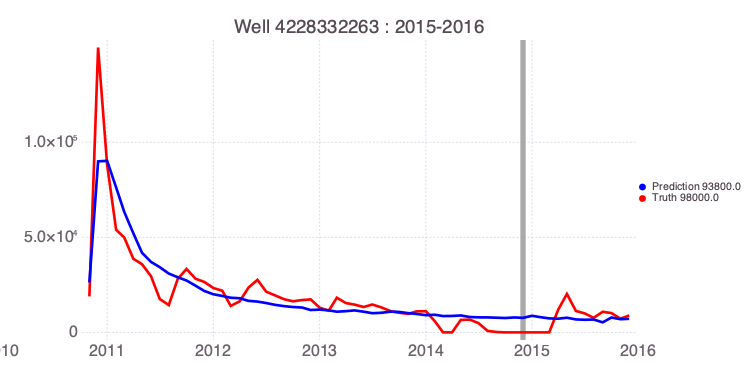

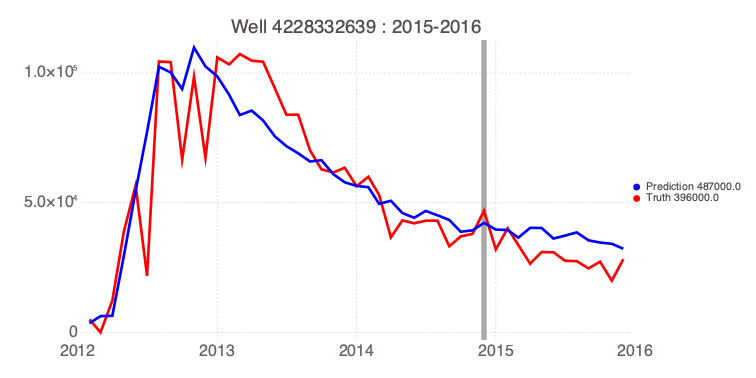

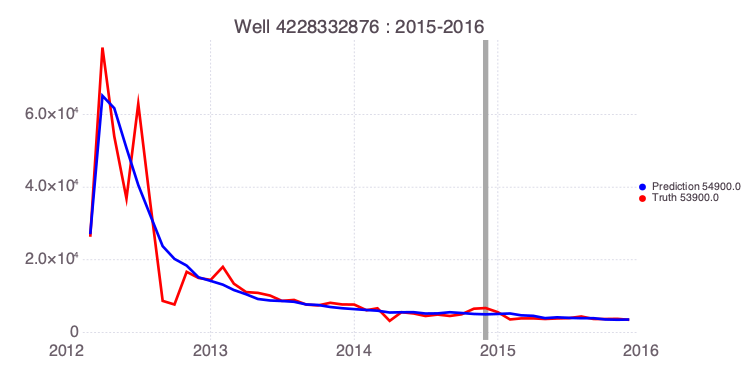

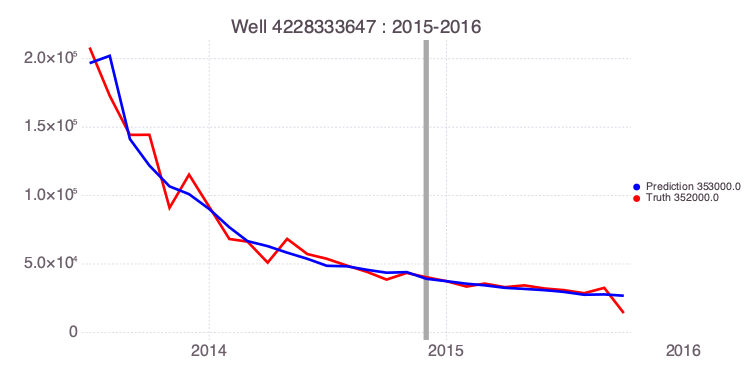

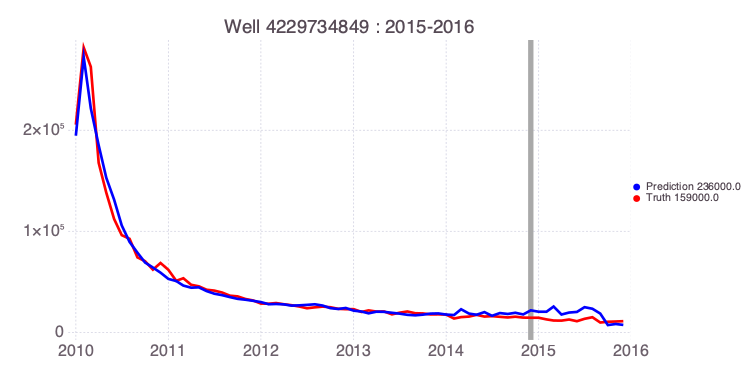

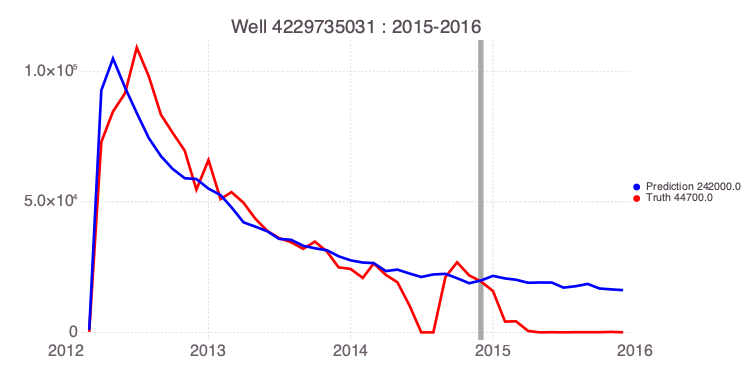

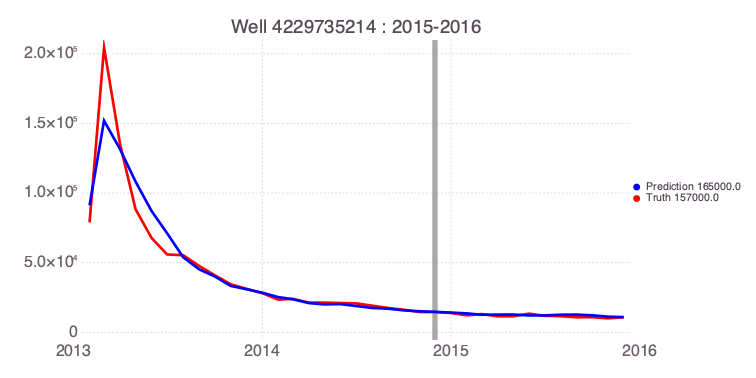

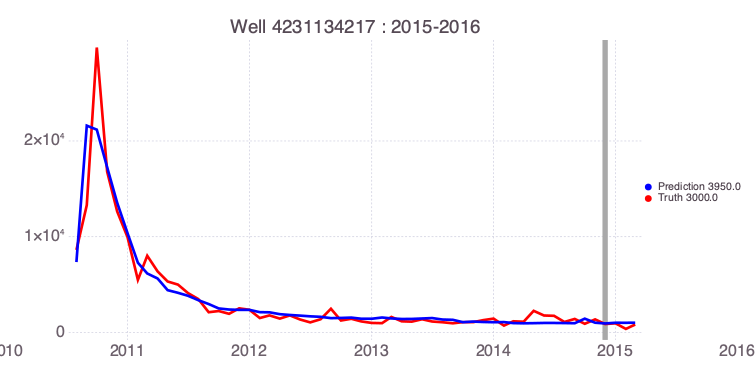

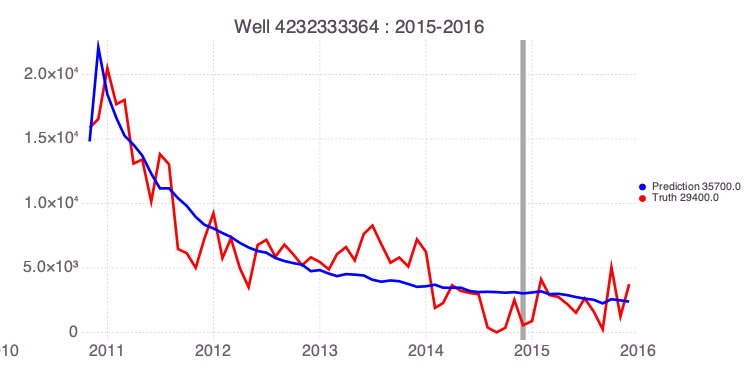

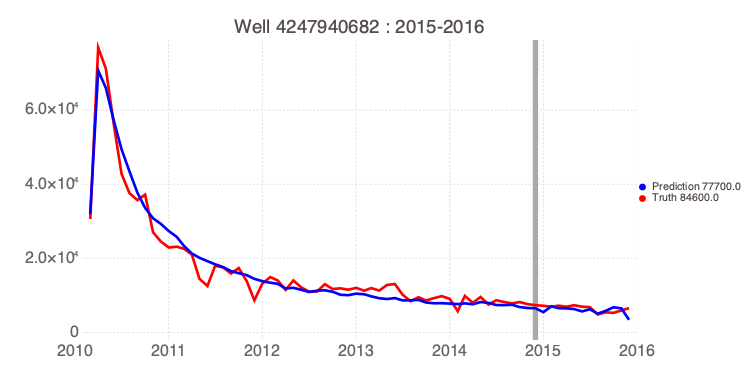

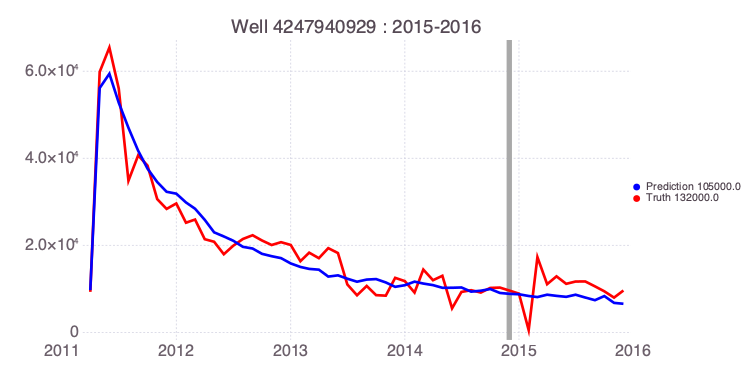

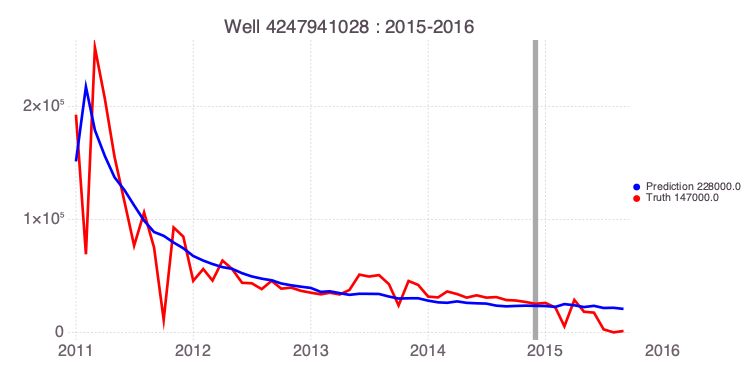

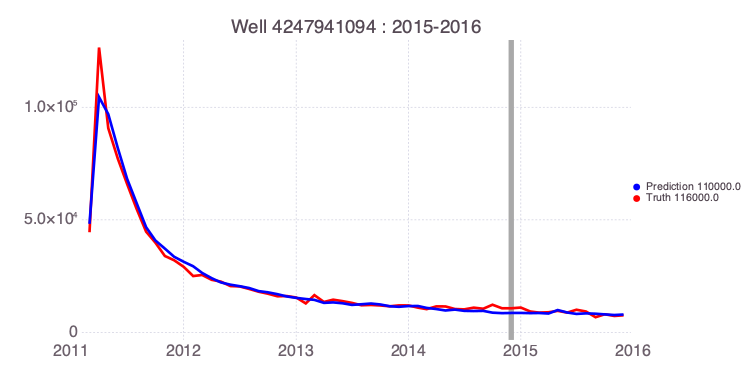

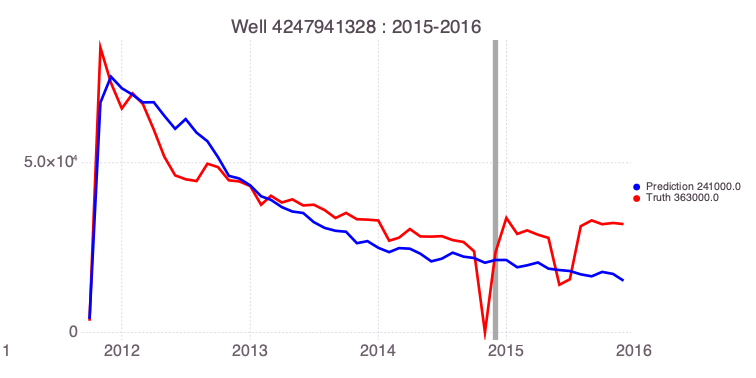

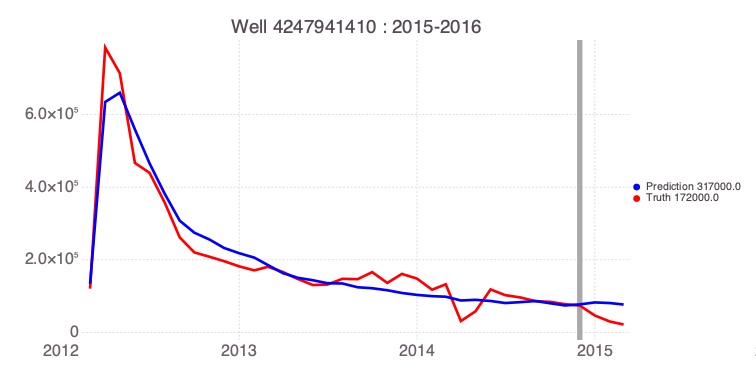

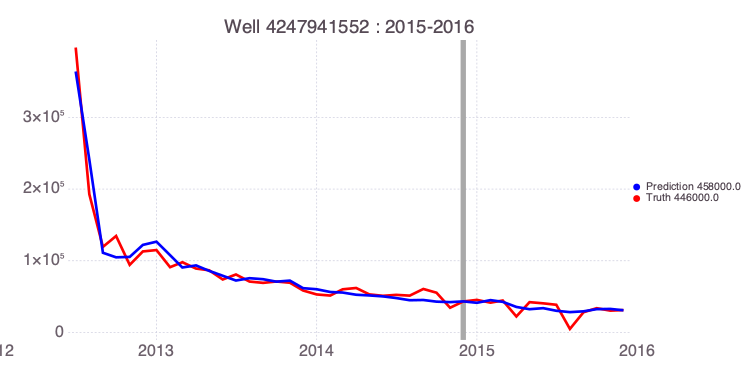

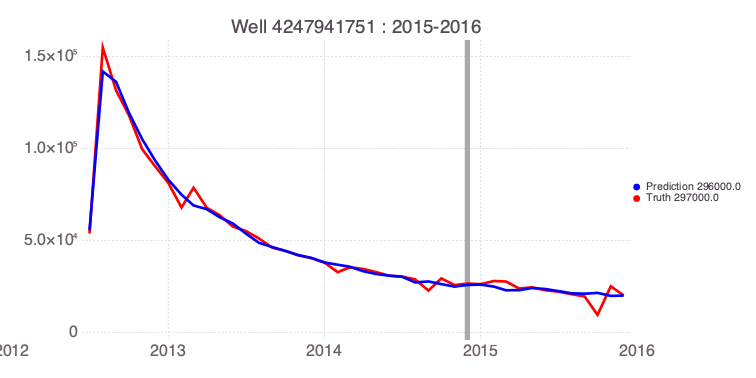

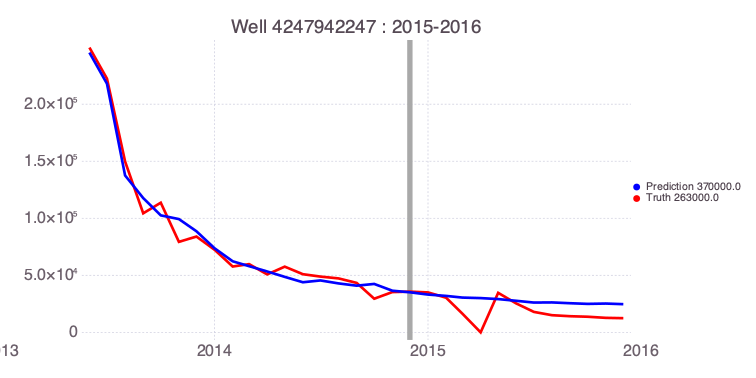

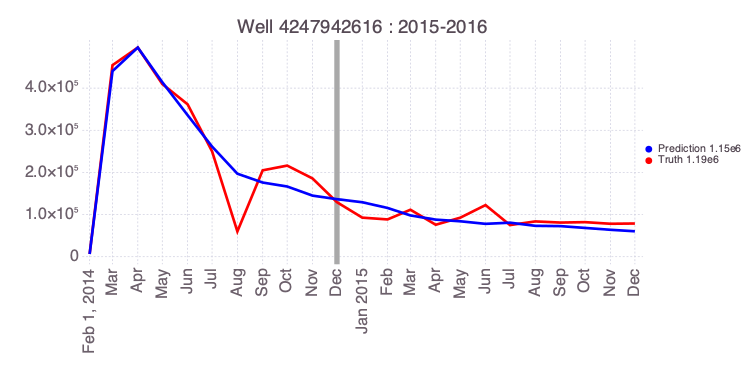

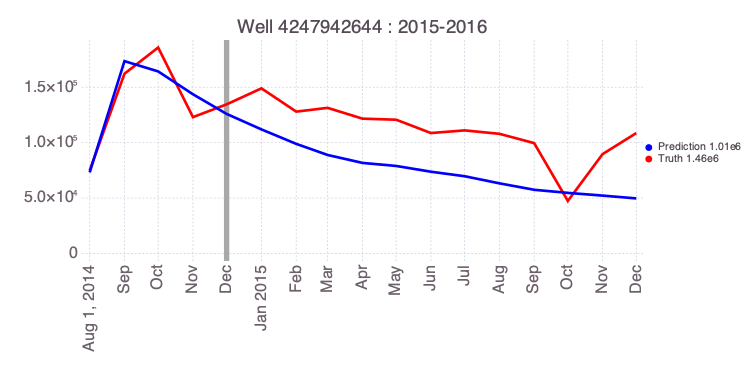

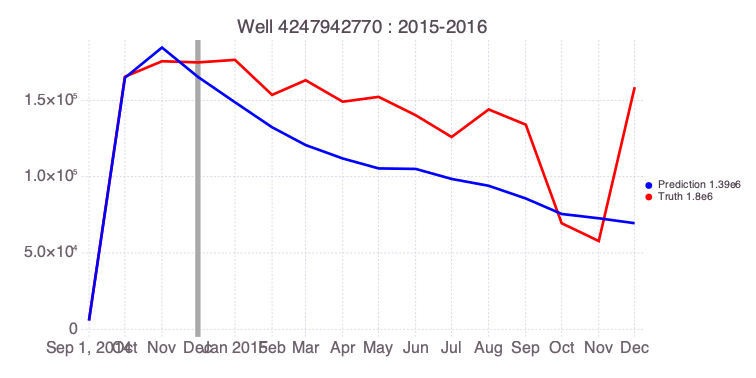

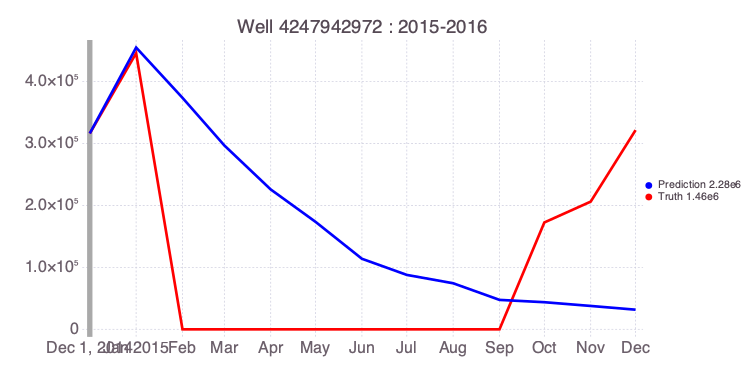

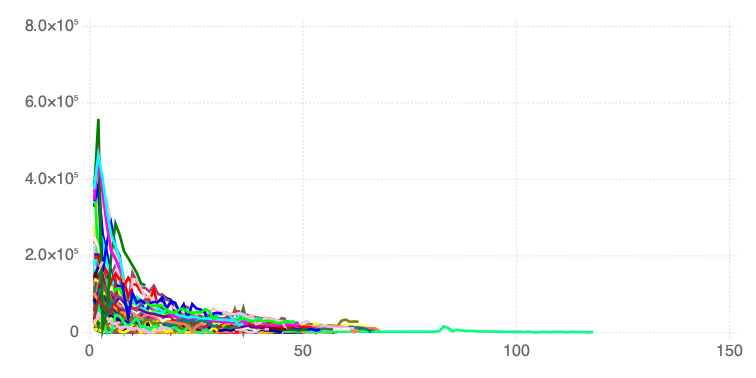

┌ Info: Window 2015: Training size 118 Truth size: 299 Prediction size: 299 R2 (pred): 0.8650471996037531 R2 (all) 0.9506983925448549
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:221
┌ Info: Type A wells: 141
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:235


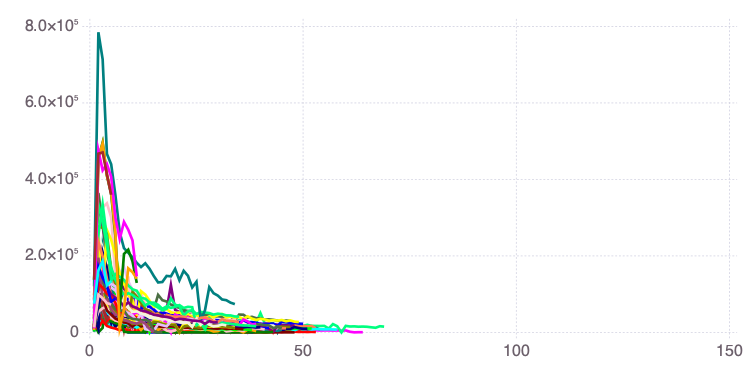

┌ Info: Type B wells: 94
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:235


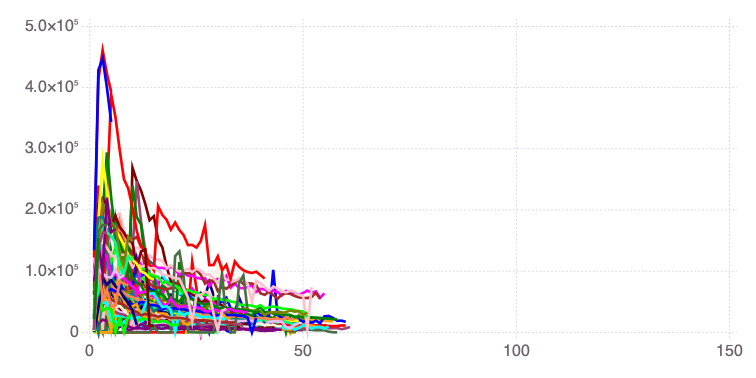

┌ Info: Type C wells: 87
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:235


1×2 Array{Any,2}:
 "EAGLE FORD"  141

21×2 Array{Any,2}:
 "LEWIS PETRO PROPERTIES, INC."      18
 "SILVERBOW RESOURCES OPER, LLC"     16
 "SM ENERGY COMPANY"                 12
 "PIONEER NATURAL RES. USA, INC."    11
 "LAREDO ENERGY OPERATING, LLC"       9
 "SN OPERATING, LLC"                  8
 "MARATHON OIL EF LLC"                7
 "BHP BILLITON PET(TXLA OP) CO"       6
 "DEVON ENERGY PRODUCTION CO, L.P."   6
 "STATOIL TEXAS ONSHORE PROP LLC"     5
 ""                                   4
 "BHP BILLITON PETROLEUM"             4
 "BURLINGTON RESOURCES O & G CO LP"   4
 "ENDEAVOR NATURAL GAS, LP"           4
 "ESCONDIDO RESOURCES OPER CO, LLC"   4
 "ROSETTA RESOURCES OPERATING LP"     4
 "BHP BILLITON PETROLEUM "            3
 "ENCANA OIL & GAS(USA) INC."         2
 "EQUINOR TEXAS ONSHORE PROP LLC"     2
 "PERDIDO ENERGY, LLC"                2
 "PROLINE ENERGY RESOURCES INC"       2

1×2 Array{Any,2}:
 "Horizontal"  141

1×2 Array{Any,2}:
 "EAGLE FORD"  94

18×2 Array{Any,2}:
 "LAREDO ENERGY OPERATING, LLC"      12
 "SILVERBOW RESOURCES OPER, LLC"     12
 "PIONEER NATURAL RES. USA, INC."     8
 "LEWIS PETRO PROPERTIES, INC."       7
 "SM ENERGY COMPANY"                  7
 "BHP BILLITON PET(TXLA OP) CO"       6
 "BHP BILLITON PETROLEUM"             6
 "ROSETTA RESOURCES OPERATING LP"     5
 "BURLINGTON RESOURCES O & G CO LP"   4
 "SN OPERATING, LLC"                  4
 "BHP BILLITON PETROLEUM "            3
 ""                                   2
 "ENCANA OIL & GAS(USA) INC."         2
 "EQUINOR TEXAS ONSHORE PROP LLC"     2
 "ESCONDIDO RESOURCES OPER CO, LLC"   2
 "MARATHON OIL EF LLC"                2
 "STATOIL TEXAS ONSHORE PROP LLC"     2
 "SWIFT ENERGY OPERATING, LLC"        2

1×2 Array{Any,2}:
 "Horizontal"  94

1×2 Array{Any,2}:
 "EAGLE FORD"  87

17×2 Array{Any,2}:
 "LEWIS PETRO PROPERTIES, INC."      21
 "PIONEER NATURAL RES. USA, INC."     9
 "DEVON ENERGY PRODUCTION CO, L.P."   7
 "SM ENERGY COMPANY"                  7
 "SILVERBOW RESOURCES OPER, LLC"      6
 "BURLINGTON RESOURCES O & G CO LP"   5
 "BHP BILLITON PET(TXLA OP) CO"       3
 "LAREDO ENERGY OPERATING, LLC"       3
 "PERDIDO ENERGY, LLC"                3
 "SN OPERATING, LLC"                  3
 "STATOIL TEXAS ONSHORE PROP LLC"     3
 ""                                   2
 "BHP BILLITON PETROLEUM "            2
 "EOG RESOURCES, INC."                2
 "ESCONDIDO RESOURCES OPER CO, LLC"   2
 "FASKEN OIL AND RANCH, LTD."         2
 "ROSETTA RESOURCES OPERATING LP"     2

1×2 Array{Any,2}:
 "Horizontal"  87

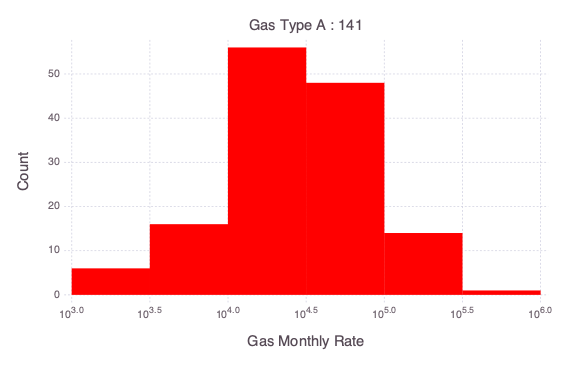

┌ Info: Type A wells: 141
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:241
┌ Info: Formation
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:242
┌ Info: Operator
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:244
┌ Info: Well type
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:246
┌ Info: Type B wells: 94
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:241
┌ Info: Formation
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:242
┌ Info: Operator
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:244
┌ Info: Well type
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:246
┌ Info: Type C wells: 87
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:241
┌ Info: Formation
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:242
┌ Info: Operator
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:244
┌ Info: Well type
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkProgressive.jl:246


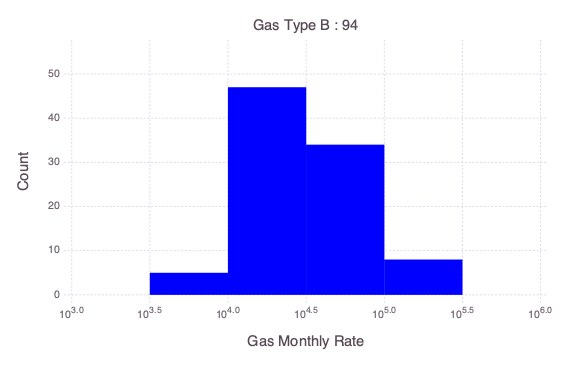

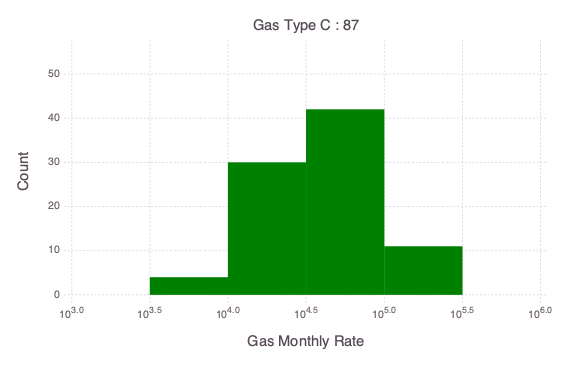

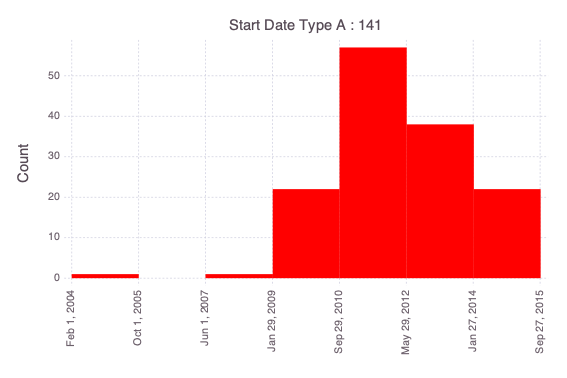

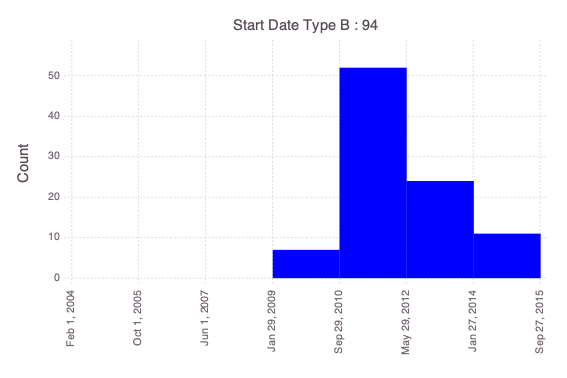

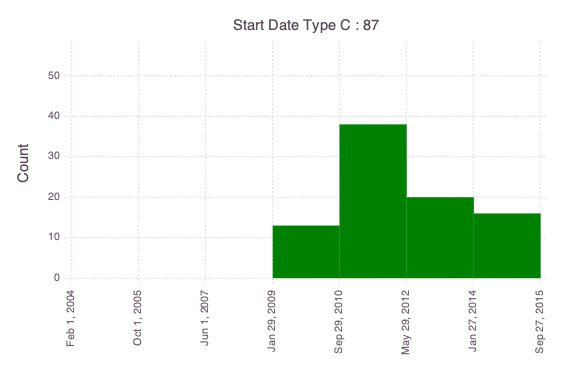

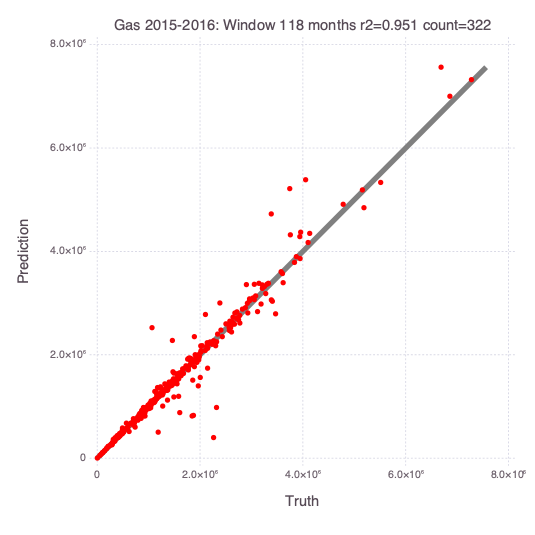

In [23]:
WellDataBaseML.execute(syears, eyears, df, df_header, api; workdir="/Users/vvv/Julia/UnconventionalML.jl", plotseries=true)